<a href="https://colab.research.google.com/github/samee-faq/Airline_Passenger_Referral_Prediction_ML_Classification_Capstone_Project/blob/main/Sameera's_Airline_Passenger_Referral_Prediction_ML_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** -
# **Airline_Passenger_Referral_Prediction_ML_Classification_Project**

---




##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Sameera Farooqui

# **Project Summary -**

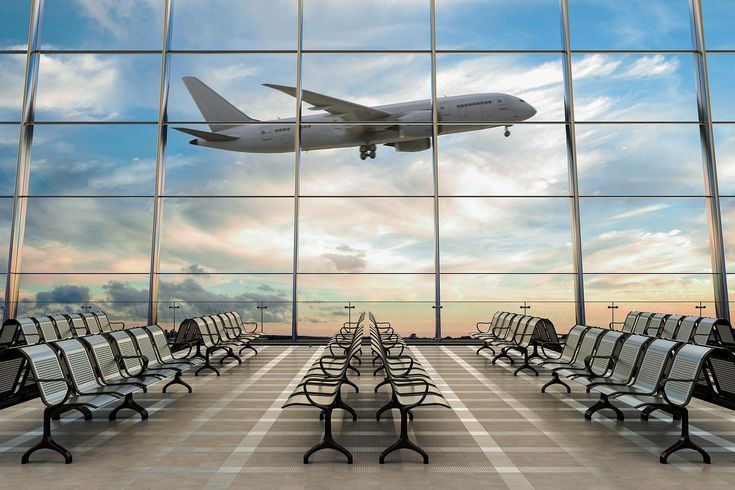

Air travel changed the world by connecting people globally in record time, making it a standout invention of the 1900s. Its main strength, speed, turned it into an essential way to transport both goods and people.

In the fast-paced world of air travel, where making passengers happy is crucial, airlines need to predict which passengers will recommend them to others. Knowing which passengers are likely to tell their friends and networks about an airline can significantly improve customer satisfaction and increase profits.

# **Steps:**

**Getting Data**

**Cleaning & Preprocessing Data:**
This involves fixing missing information, handling extreme values, and making data easier to use for analysis.

**Exploring Data Analysis(EDA):**
This means looking at the data using different graphs and charts.

**Dividing the Data:**
Splitting it into parts for training and testing.

**Choosing Models and Hyperparameter Tuning:**
To make accurate predictions, various classification models are used, such as Logistic Regression, Random Forests, and Support Vector Machines (SVM). . Ensuring model reliability, hyperparameter tuning is performed to optimize performance and mitigate overfitting of these models helps make them work better.

**Measuring Performance:**
This focuses on metrics that tell how well the models work. The most important is Recall, followed by Accuracy and ROC AUC. These metrics show how well the models can correctly identify passengers who will recommend airlines. This is essential for making customer-focused strategies.

# **GitHub Link -**

https://github.com/samee-faq/Airline_Passenger_Referral_Prediction_ML_Classification_Capstone_Project/tree/main

# **Problem Statement**


In the competitive airline industry, pleasing customers and keeping them loyal is crucial for success. Airlines are always looking for new ways to make passengers happier and improve their reputation. One big challenge is figuring out which passengers are likely to recommend the airline to others.

The goal is to create a model that can predict which passengers will refer the airline to their friends. This model will help airlines:

 * Make customers happier

* Make more money

* Advertise more effectively

* Provide better service Stay ahead of the competition

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

#**Importing Libraries and Connecting Drive**

In [1]:
# Import Librariesimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing all models from sklearn to be used in model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing  metrics for evaluation of models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dataset last observations
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


# **Data Inispection**

In [6]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

 * **Dataset have 131895 observations and 17 columns.**

In [7]:
# Checking columns name of dataset
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

#**Dataset Information**

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

**1.In the dataset, there are object, float64 dtypes features present.**

**2.Dataset is having numerical and categorical data.**

**3.Mixed data (Numerical+Categorical)**

**4.There are 17 features**

In [10]:
# Basic description of Dataset
df.describe(include='all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,65947,64017.000000,65947,65947,65947,19718,39755,63303,39726,39633,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000,64440
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,On March 2/14 a friend and I were booked on an...,A320,Solo Leisure,Economy Class,Bangkok to Hong Kong,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2934,NaN,96,253,6,2157,14798,48558,35,1204,NaN,NaN,NaN,NaN,NaN,NaN,33894
mean,NaN,5.145430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962,NaN
std,NaN,3.477532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


# **Duplicate Values**

In [11]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 70711 duplicated values


#  **Missing Values/Null Values**

In [12]:
# Missing Values/Null Values Count
missing_values=df.isnull().sum()
missing_values

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

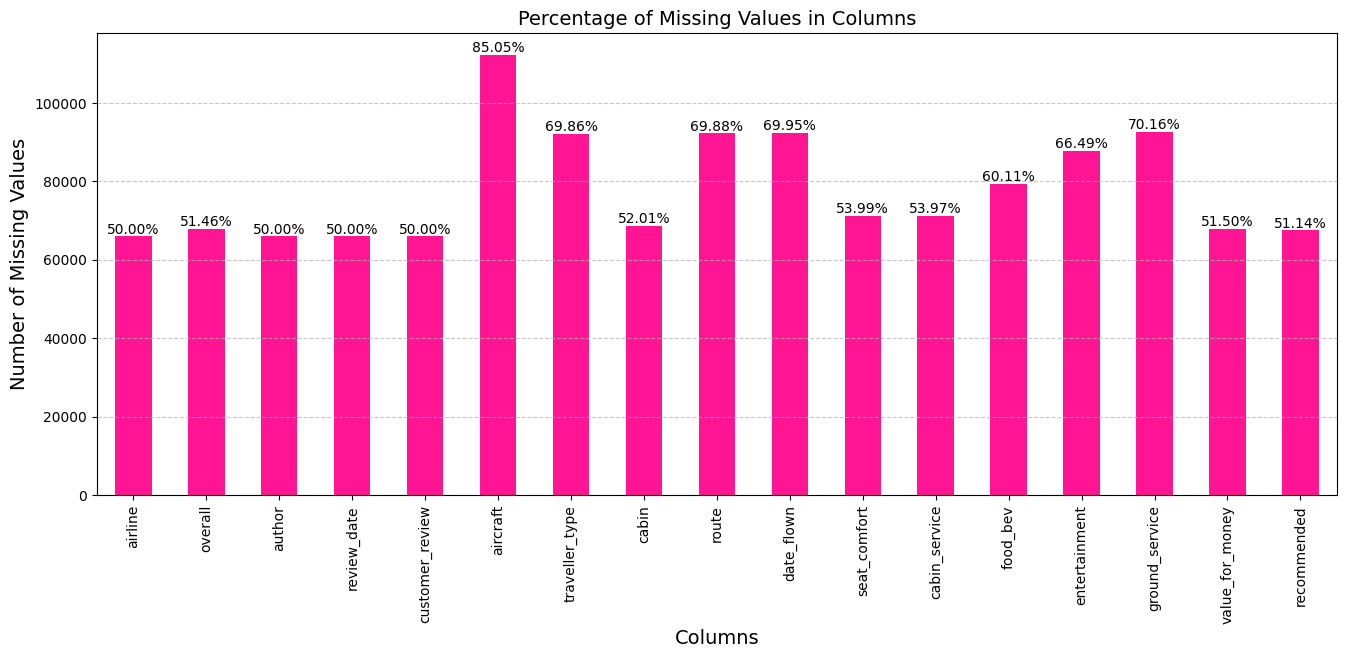

In [13]:
# Visualizing the missing values

columns_with_missing_values = missing_values[missing_values > 0]      #  Filter columns with missing values

# Calculate the percentage of missing values in each column
total_rows = len(df)
percentage_missing = (columns_with_missing_values / total_rows) * 100

# Create a bar chart
plt.figure(figsize=(16, 6))
bar_plot = columns_with_missing_values.plot(kind='bar', color='deeppink')
plt.xlabel('Columns',fontsize=14)
plt.ylabel('Number of Missing Values',fontsize=14)
plt.title('Percentage of Missing Values in Columns',fontsize=14)
plt.xticks(rotation=90, ha='center',fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the percentage of missing values on top of each bar
for index, value in enumerate(columns_with_missing_values):
    plt.text(index, value, f'{percentage_missing[index]:.2f}%', ha='center', va='bottom',fontsize=10)

plt.show()

### What did you know about your dataset?

 * The dataset is well-prepared for further analysis, as it contains 131895 rows and 17 features.

 -There are some missing values in every feature, which need to be fixed either by using the fillna method or dropping the rows.

* Additionally, there are 70711 duplicate rows, which also need to be dropped. so that there is a clean and unique dataset for analysis.

* Most of the features are either objects or floats. If necessary, it needs to be converted into the required datatype.

* After the necessary cleaning, the dataset will be ready for preprocessing steps, allowing the focus to be on feature engineering and model development to achieve accurate predictions.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

# **Variables Description**

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**review date:** Date of the Review

**customer review:**Review of the customers in free text format

**aircraft:** Type of the aircraft

**traveller type:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5

**entertainment:** Rated between 1-5

**ground service:** Rated between 1-5

**value for money:** Rated between 1-5

**recommended**: Binary, target variable.

# **Check Unique Values for each variable.**

In [15]:
# Check Unique Values for each variable.
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [16]:
#Overall discription of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


In [17]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['airline', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'recommended']


In [18]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())
  print('--'*45)

airline
[nan 'Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airw

In [19]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']


In [20]:
# Checking unique values from each variable
for i in df.columns.tolist():
  print("No. of unique values in", i ,"is", df[i].nunique())
  print('--'*50)

No. of unique values in airline is 81
----------------------------------------------------------------------------------------------------
No. of unique values in overall is 10
----------------------------------------------------------------------------------------------------
No. of unique values in author is 44069
----------------------------------------------------------------------------------------------------
No. of unique values in review_date is 3015
----------------------------------------------------------------------------------------------------
No. of unique values in customer_review is 61172
----------------------------------------------------------------------------------------------------
No. of unique values in aircraft is 2088
----------------------------------------------------------------------------------------------------
No. of unique values in traveller_type is 4
----------------------------------------------------------------------------------------------------

In [21]:
#Checking the unique values of the target variable
df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.

# Dropping the column with more than 80 % empty columns
df = df.drop(columns='aircraft',axis=1)

In [23]:
#droping the duplicate values
df.drop_duplicates(inplace = True)

In [24]:
# Convert the "review_date" & "date_flown" column from object to datetime data type
df['review_date'] = pd.to_datetime(df['review_date'])
df['date_flown'] = pd.to_datetime(df['date_flown'])

In [25]:
# Extract the year from the "date_flown" column and create a new column "year"
df['year'] =  df['date_flown'].dt.year

In [26]:
# Checking for the changes made in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   overall          59401 non-null  float64       
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  datetime64[ns]
 4   customer_review  61183 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   seat_comfort     56211 non-null  float64       
 10  cabin_service    56240 non-null  float64       
 11  food_bev         48341 non-null  float64       
 12  entertainment    40230 non-null  float64       
 13  ground_service   37169 non-null  float64       
 14  value_for_money  59327 non-null  floa

In [27]:
df.shape

(61184, 17)

### What all manipulations have you done and insights you found?

**-First, because the "aircraft" column has over 80% missing information, it's been removed.**

**-Next, duplicate rows were deleted, which helped to reduce some missing data.**

**-The "review date" and "date_flown" columns had the wrong data type, so they were changed to the correct type, which is datetime.**

**-Finally, a new column called "year" was created using information from the "date_flown" column.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#**Questions-**

###1.Which Traveller_type has more ratings?

###2.Which type of Cabin has more recommendation?

###3.Is it Solo Leisure worth for Money?

###4.In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

###5.Which cabin type has more service ratings?

###6.Which cabin type has overall service ratings?

###7.Which travellers_type has overall service ratings?

###8.Which airline made highest trips?

###9.Comparison of all independent variable/features?

#### Chart - 1
**1) Which Traveller_type has more ratings?**


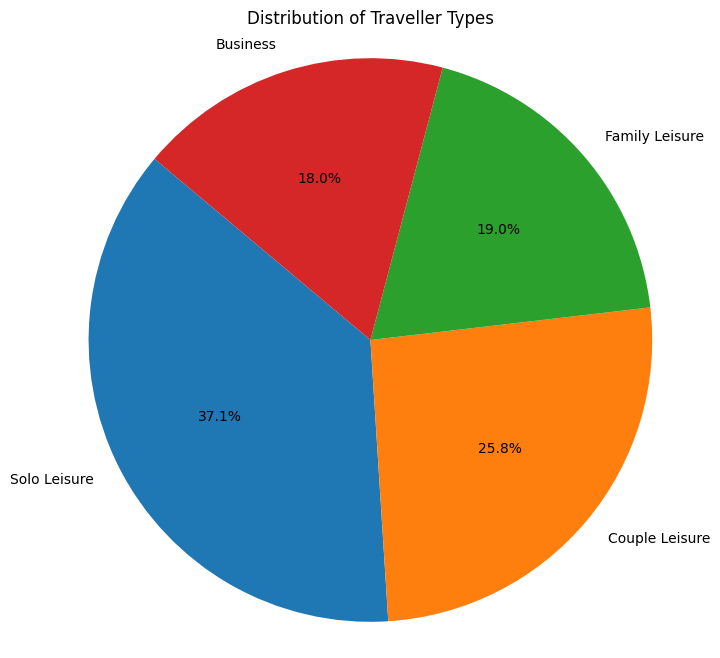

In [28]:
# Chart - 1 visualization code
#setting the figure size and plotting the graph
traveller_type_counts = df['traveller_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(traveller_type_counts, labels=traveller_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Traveller Types')
plt.axis('equal')

# Show the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* **From above plot we can see Travelling type of Solo Leisure has more ratings**

#### Chart - 2
**2) Which type of Cabin has more recommendation?**

<Axes: xlabel='cabin', ylabel='count'>

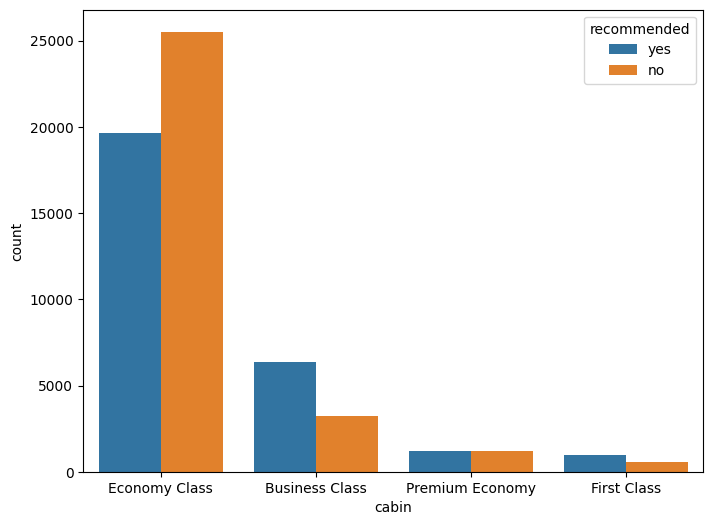

In [29]:
# visualization code
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(x= df['cabin'],hue=df['recommended'])

##### 2. What is/are the insight(s) found from the chart?

**According to the graph:**

- Economy class receives the most recommendations despite having some bad reviews.
- Business class follows  the second most recommended cabin type, generally receiving good reviews.
- Premium economy shows an equal number of reviews, without a clear distinction in recommendations.
- First class is the least recommended cabin type, despite generally having good reviews.

#### Chart - 3
**3)Is going on a solo leisure trip worth the money?**

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

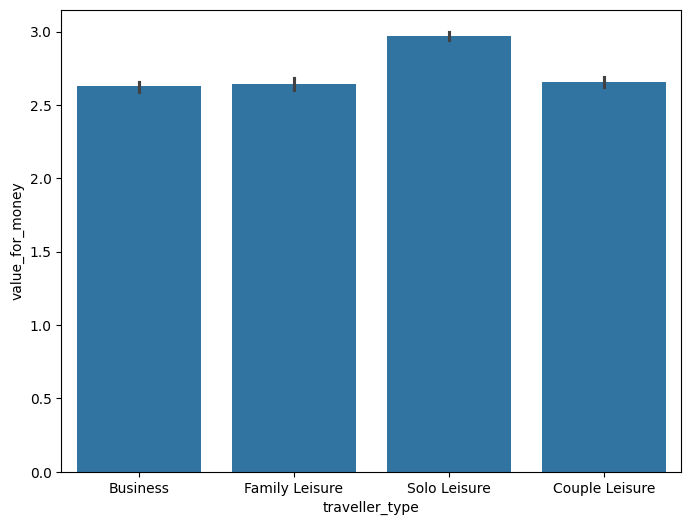

In [30]:
# Chart - 3 visualization code
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=df['traveller_type'],y=df['value_for_money'])

##### 2. What is/are the insight(s) found from the chart?

* **From above plot we can say that Travelling Type of Solo Leisure worth of Money compare to other type of travelling.**

#### Chart - 4
**4)What are the average ratings passengers give for food and beverage as well as entertainment in Economy Class?**

In [31]:
# Chart - 4
#performing the grouphby method
eda=df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

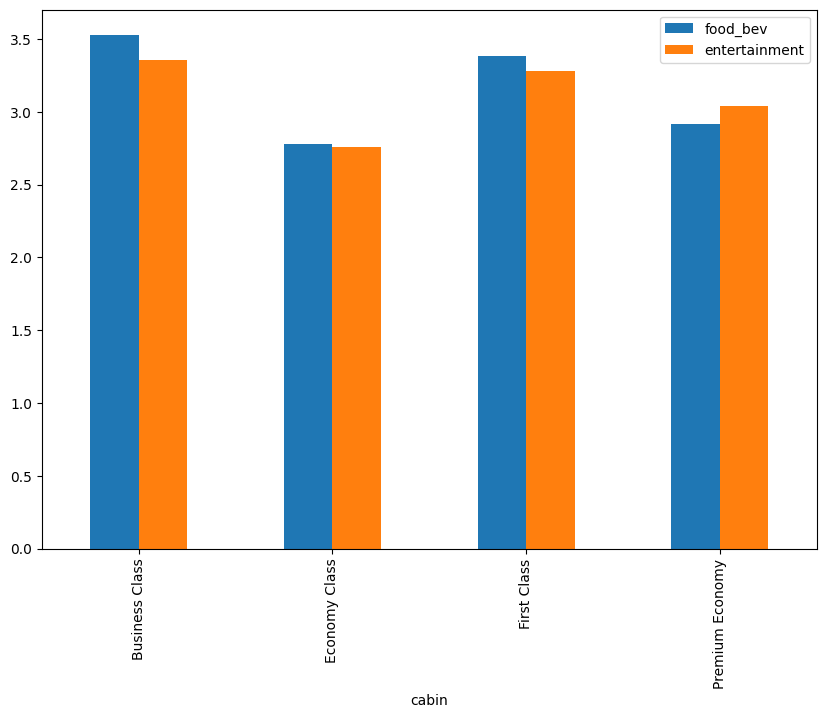

In [32]:
# visualization code
plt.rcParams['figure.figsize']=(10,7)
eda.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

##### 2. What is/are the insight(s) found from the chart?

**According to the plot In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.**

#### Chart - 5
**5)Which cabin type receives higher service ratings?**

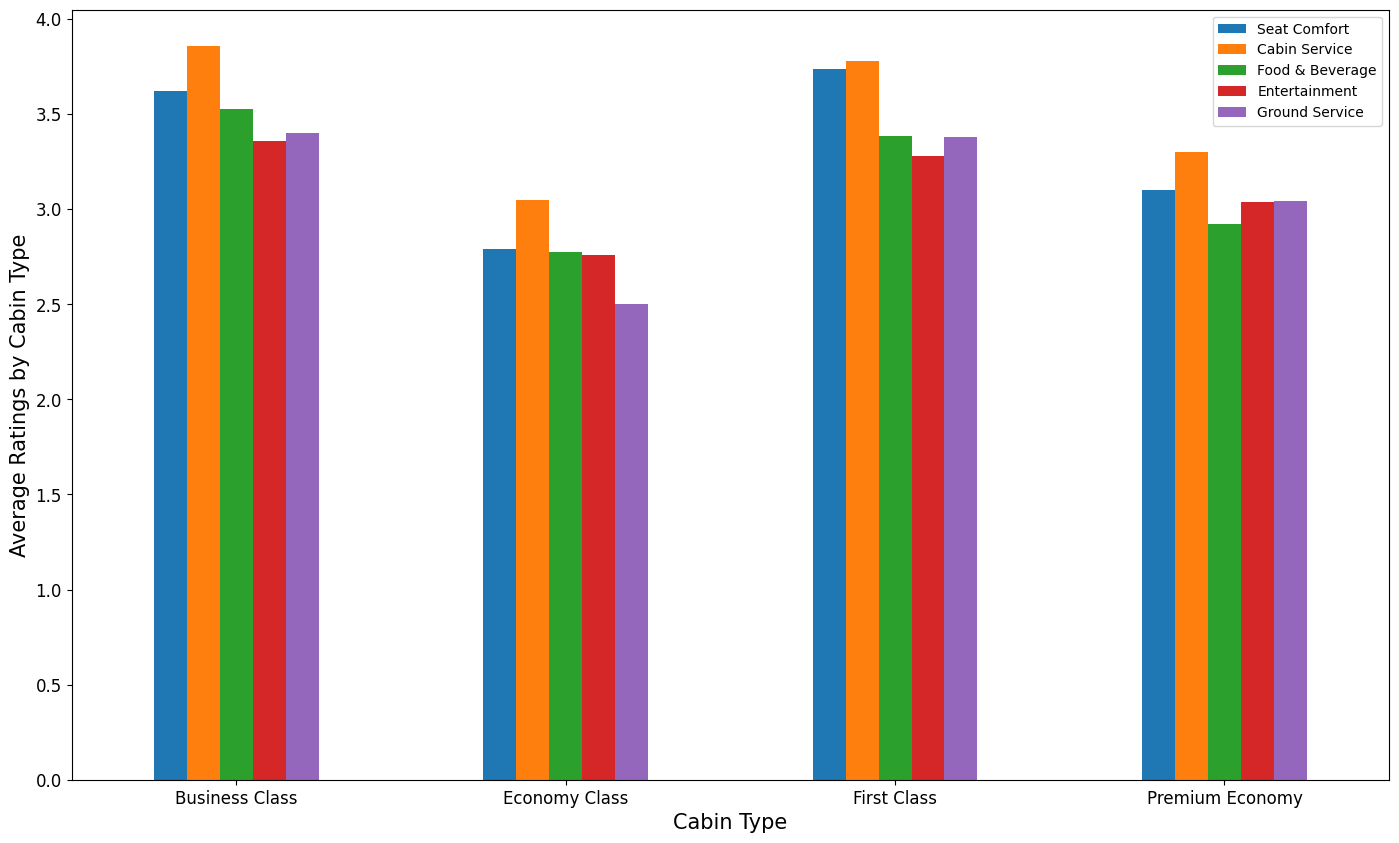

In [33]:
# Chart - 5 visualization code
#Cabin type and cabin service ratings
# Calculate the average ratings for 'seat_comfort','cabin_service','food_bev', 'entertainment','ground_service' by cabin
average_ratings = df.groupby('cabin')[['seat_comfort','cabin_service','food_bev', 'entertainment','ground_service']].mean().reset_index()

# Set the figure size
plt.rcParams['figure.figsize']=(17,10)
average_ratings.plot(x="cabin", y=['seat_comfort','cabin_service','food_bev', 'entertainment','ground_service'], kind="bar",fontsize=12)
plt.xlabel("Cabin Type",fontsize=15)
plt.ylabel("Average Ratings by Cabin Type",fontsize=15)
plt.legend(["Seat Comfort", "Cabin Service", "Food & Beverage", "Entertainment", "Ground Service"])
plt.xticks(rotation=0)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

**From above Graph:**

* First-class travelers are the least likely to recommend the airlines.

* The highest probability of receiving a recommendation occurs when passengers rate the cabin service with a full five-star rating.

* For Economy Class, if ratings fall between 4 to 5, it generally indicates that passengers recommend the airlines.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***